In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

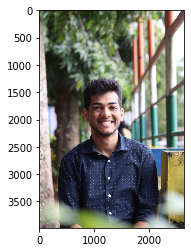

In [17]:
image = cv2.imread('images\IMG.JPG')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [18]:
pixel_val = image.reshape((-1,3))
pixel_val = np.float32(pixel_val)

In [11]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [ ]:
k=4
retvals,labels,centers = cv2.kmeans(pixel_val,k,None,criteria,20,cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

plt.imshow(segmented_image)

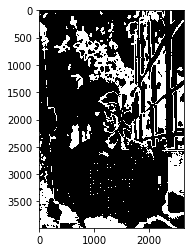

In [26]:
plt.imshow(labels_reshape==0, cmap='gray')

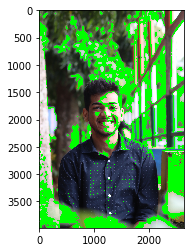

In [27]:
# mask an image segment by cluster

cluster = 0 # the first cluster

masked_image = np.copy(image)
# turn the mask green!
masked_image[labels_reshape == cluster] = [0, 255, 0]

plt.imshow(masked_image)